## first import the basic libraries

In [77]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import numpy as np

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sn

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

# Data description and pre-processing

In [78]:
cswk = pd.read_csv('coursework_1_data_2019.csv')

In [79]:
cswk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   local_authority_area        152 non-null    object 
 1   2008_cases_total            152 non-null    int64  
 2   2008_total_case-ratio       152 non-null    float64
 3   2013_cases_total            152 non-null    int64  
 4   2013_total_case_ratio       152 non-null    float64
 5   2018_cases_total            152 non-null    int64  
 6   2018_total_case_ratio       152 non-null    float64
 7   08_13_case_ratio_change     152 non-null    float64
 8   13_18_case_ratio_change     152 non-null    float64
 9   08_18_ratio_change_average  152 non-null    float64
 10  2008_pop_total              152 non-null    int64  
 11  2013_pop_total              152 non-null    int64  
 12  2018_pop_total              152 non-null    int64  
 13  2008_cases_male             152 non

In [80]:
cswk.head()

,local_authority_area,2008_cases_total,2008_total_case-ratio,2013_cases_total,2013_total_case_ratio,2018_cases_total,2018_total_case_ratio,08_13_case_ratio_change,13_18_case_ratio_change,08_18_ratio_change_average,...,2018_pop_female,total_budget,clean_air,clean_environ,health_training,school_awareness,media_awareness,sub_counselling,region,local_authority_type
0,Barking and Dagenham,593,0.0034,619,0.0035,763,0.0042,0.0000,0.0007,0.0004,...,103796,139000,21000,22000,18000,41000,18000,19000,London,london_borough
1,Barnet,539,0.0016,594,0.0017,773,0.0022,0.0001,0.0004,0.0003,...,194186,220000,50000,17000,23000,74000,30000,26000,London,london_borough
2,Barnsley,360,0.0016,451,0.0018,527,0.0020,0.0003,0.0002,0.0002,...,130828,160000,41000,45000,5000,26000,29000,14000,Yorkshire and the Humber,metropolitan_borough
3,Bath and North East Somerset,456,0.0026,421,0.0024,494,0.0026,-0.0001,0.0002,0.0000,...,98444,161000,33000,42000,19000,50000,10000,7000,South West,unitary_authority
4,Bedford,311,0.0020,327,0.0020,367,0.0022,0.0000,0.0002,0.0001,...,87854,130000,37000,52000,17000,8000,3000,13000,East of England,unitary_authority


## ADD NEW COLUMN

In [81]:
#add 2008,2013,2018 average population 
cswk['08-18_average_pop']=(cswk['2008_pop_total']+cswk['2013_pop_total']+cswk['2018_pop_total'])/3
cswk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   local_authority_area        152 non-null    object 
 1   2008_cases_total            152 non-null    int64  
 2   2008_total_case-ratio       152 non-null    float64
 3   2013_cases_total            152 non-null    int64  
 4   2013_total_case_ratio       152 non-null    float64
 5   2018_cases_total            152 non-null    int64  
 6   2018_total_case_ratio       152 non-null    float64
 7   08_13_case_ratio_change     152 non-null    float64
 8   13_18_case_ratio_change     152 non-null    float64
 9   08_18_ratio_change_average  152 non-null    float64
 10  2008_pop_total              152 non-null    int64  
 11  2013_pop_total              152 non-null    int64  
 12  2018_pop_total              152 non-null    int64  
 13  2008_cases_male             152 non

In [82]:
#add each kind of budget by per person(budget/pop)
cswk['total_budget_pp']=cswk['total_budget']/cswk['08-18_average_pop']
cswk['clean_air_pp']=cswk['clean_air']/cswk['08-18_average_pop']
cswk['clean_environ_pp']=cswk['clean_environ']/cswk['08-18_average_pop']
cswk['health_training_pp']=cswk['health_training']/cswk['08-18_average_pop']
cswk['media_awareness_pp']=cswk['media_awareness']/cswk['08-18_average_pop']
cswk['sub_counselling_pp']=cswk['sub_counselling']/cswk['08-18_average_pop']
#add colomn cases gender rate by years
cswk['2008cases_gender_rate']=cswk['2008_cases_male']/cswk['2008_cases_female']
cswk['2013cases_gender_rate']=cswk['2013_cases_male']/cswk['2013_cases_female']
cswk['2018cases_gender_rate']=cswk['2018_cases_male']/cswk['2018_cases_female']
#add colomn pop gender rate by years
cswk['2008pop_gender_rate']=cswk['2008_pop_male']/cswk['2008_pop_female']
cswk['2013pop_gender_rate']=cswk['2013_pop_male']/cswk['2013_pop_female']
cswk['2018pop_gender_rate']=cswk['2018_pop_male']/cswk['2018_pop_female']
cswk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   local_authority_area        152 non-null    object 
 1   2008_cases_total            152 non-null    int64  
 2   2008_total_case-ratio       152 non-null    float64
 3   2013_cases_total            152 non-null    int64  
 4   2013_total_case_ratio       152 non-null    float64
 5   2018_cases_total            152 non-null    int64  
 6   2018_total_case_ratio       152 non-null    float64
 7   08_13_case_ratio_change     152 non-null    float64
 8   13_18_case_ratio_change     152 non-null    float64
 9   08_18_ratio_change_average  152 non-null    float64
 10  2008_pop_total              152 non-null    int64  
 11  2013_pop_total              152 non-null    int64  
 12  2018_pop_total              152 non-null    int64  
 13  2008_cases_male             152 non

## Encoding of categorical variables

In [83]:
cswk_numeric = pd.get_dummies(cswk.drop(['local_authority_area','2008_cases_total','2008_total_case-ratio','2013_cases_total','2013_total_case_ratio','2018_cases_total','2018_total_case_ratio','2008_pop_total','2013_pop_total','2018_pop_total','2008_cases_male','2013_cases_male','2018_cases_male','2008_cases_female','2013_cases_female','2018_cases_female','2008_pop_male','2013_pop_male','2018_pop_male','2008_pop_female','2013_pop_female','2018_pop_female'], axis=1))
cswk_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   08_13_case_ratio_change                       152 non-null    float64
 1   13_18_case_ratio_change                       152 non-null    float64
 2   08_18_ratio_change_average                    152 non-null    float64
 3   total_budget                                  152 non-null    int64  
 4   clean_air                                     152 non-null    int64  
 5   clean_environ                                 152 non-null    int64  
 6   health_training                               152 non-null    int64  
 7   school_awareness                              152 non-null    int64  
 8   media_awareness                               152 non-null    int64  
 9   sub_counselling                               152 non-null    int

In [84]:
#model_variables_selected = cswk_numeric.loc[:,['', 'total_budget', 'clean_air', 'clean_environ', 'health_training', 'school_awareness', 'media_awareness', 'health_training','']]

## Checking the correlation between variables

Text(0.5, 1.0, 'Correlation Matrix')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Kaiti
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Kaiti


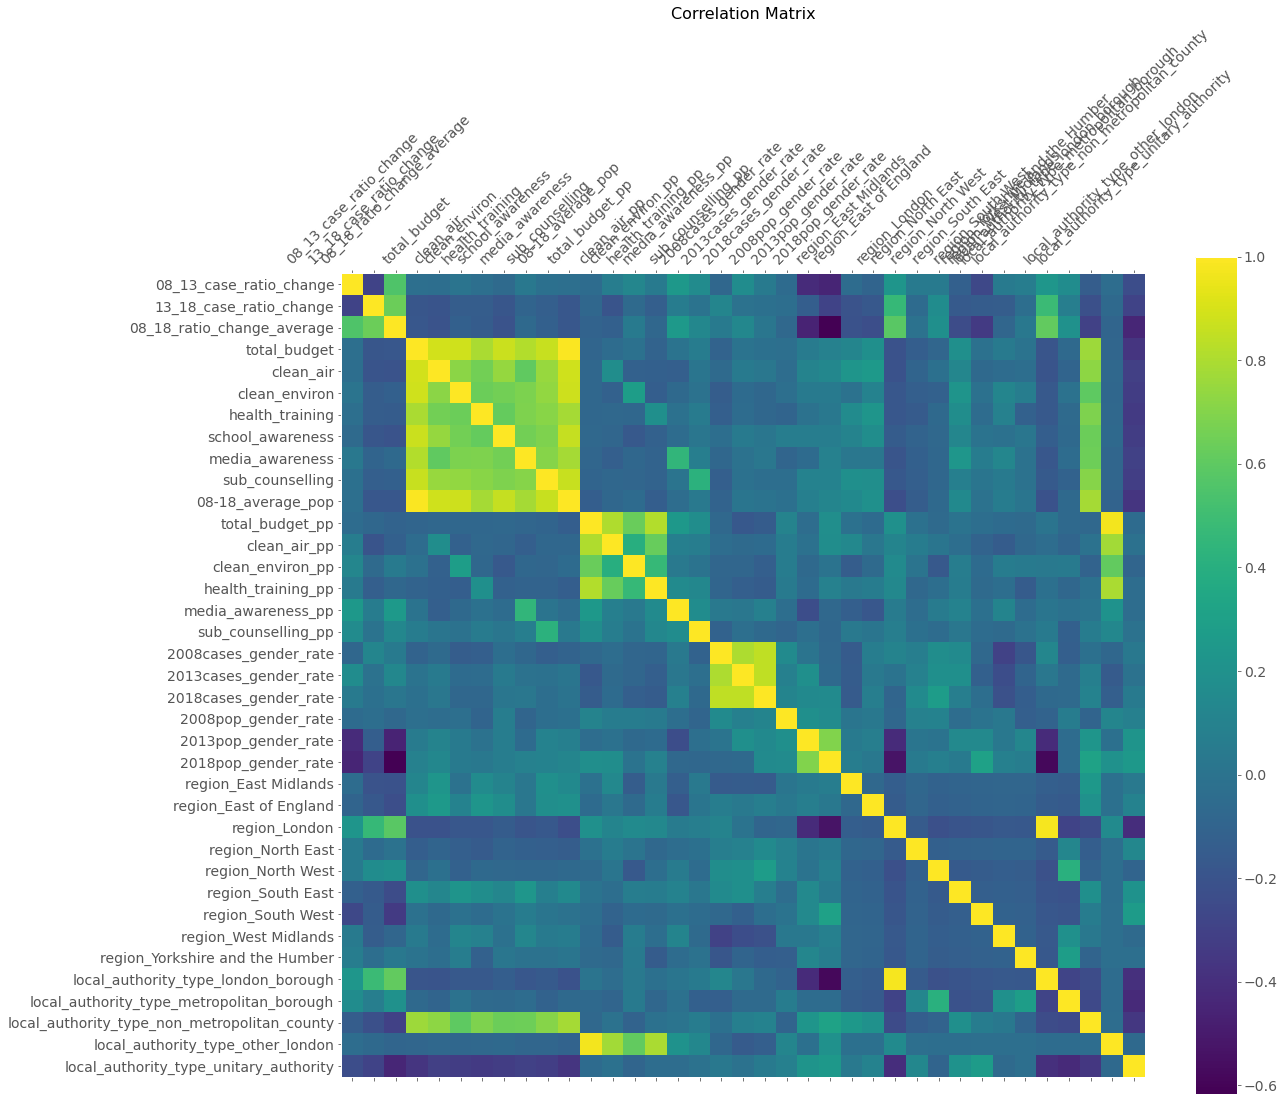

In [123]:
df = cswk_numeric
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(18, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

# Using VIF to deal with multicollinearity

In [86]:
# calculating VIF
# This function is adjusted from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: (default 5) the threshould VIF value. If the VIF of a variable is greater than thresh, it should be removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data. add_constant is a function from statsmodels (see the import above)
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        # If there are multiple variabels with VIF>thresh, only one of them is removed. This is because we want to keep as many variables as possible
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [90]:
cswk_predictors_selected_VIF = drop_column_using_vif_(cswk_numeric.drop(['08_18_ratio_change_average','08_13_case_ratio_change','13_18_case_ratio_change'], axis=1))

/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropping: total_budget
Dropping: region_East Midlands
Dropping: region_London
Dropping: local_authority_type_london_borough
Dropping: 08-18_average_pop
Dropping: total_budget_pp
Dropping: sub_counselling
Dropping: clean_air
Dropping: media_awareness
Dropping: 2018cases_gender_rate
Dropping: local_authority_type_other_london
Dropping: local_authority_type_unitary_authority
Dropping: clean_environ


In [91]:
print("The columns remaining after VIF selection are:")
print(cswk_predictors_selected_VIF.columns)

The columns remaining after VIF selection are:
Index(['health_training', 'school_awareness', 'clean_air_pp',
       'clean_environ_pp', 'health_training_pp', 'media_awareness_pp',
       'sub_counselling_pp', '2008cases_gender_rate', '2013cases_gender_rate',
       '2008pop_gender_rate', '2013pop_gender_rate', '2018pop_gender_rate',
       'region_East of England', 'region_North East', 'region_North West',
       'region_South East', 'region_South West', 'region_West Midlands',
       'region_Yorkshire and the Humber',
       'local_authority_type_metropolitan_borough',
       'local_authority_type_non_metropolitan_county'],
      dtype='object')


In [92]:
model_case_budget = sm.OLS(endog=cswk_numeric[['08_18_ratio_change_average']], exog=sm.add_constant(cswk_predictors_selected_VIF)).fit()
model_case_budget.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     08_18_ratio_change_average   R-squared:                       0.682
Model:                                    OLS   Adj. R-squared:                  0.631
Method:                         Least Squares   F-statistic:                     13.29
Date:                        Sun, 14 Nov 2021   Prob (F-statistic):           3.73e-23
Time:                                21:46:59   Log-Likelihood:                 1236.8
No. Observations:                         152   AIC:                            -2430.
Df Residuals:                             130   BIC:                            -2363.
Df Model:                                  21                                         
Covariance Type:                    nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                            0.0004      0.000      1.066      0.288      -0.000       0.001
health_training                               4.528e-10   5.03e-10      0.900      0.370   -5.43e-10    1.45e-09
school_awareness                             -3.496e-10    1.7e-10     -2.060      0.041   -6.85e-10   -1.38e-11
clean_air_pp                                    -0.0002   8.31e-05     -2.199      0.030      -0.000   -1.83e-05
clean_environ_pp                                 0.0002   7.94e-05      2.003      0.047    1.92e-06       0.000
health_training_pp                              -0.0002      0.000     -1.086      0.280      -0.001       0.000
media_awareness_pp                               0.0007      0.000      4.248      0.000       0.000       0.001
sub_counselling_pp                               0.0003      0.000      1.092      0.277      -0.000       0.001
2008cases_gender_rate                           -0.0003   9.92e-05     -3.007      0.003      -0.000      -0.000
2013cases_gender_rate                            0.0003   8.51e-05      3.524      0.001       0.000       0.000
2008pop_gender_rate                              0.0003      0.000      0.771      0.442      -0.000       0.001
2013pop_gender_rate                             -0.0001      0.000     -0.933      0.352      -0.000       0.000
2018pop_gender_rate                             -0.0003      0.000     -3.078      0.003      -0.001      -0.000
region_East of England                          -0.0001   2.78e-05     -4.541      0.000      -0.000   -7.13e-05
region_North East                            -8.212e-05   2.92e-05     -2.808      0.006      -0.000   -2.43e-05
region_North West                            -2.995e-05   2.78e-05     -1.078      0.283   -8.49e-05     2.5e-05
region_South East                               -0.0002   2.39e-05     -6.293      0.000      -0.000      -0.000
region_South West                               -0.0001   2.74e-05     -5.337      0.000      -0.000   -9.19e-05
region_West Midlands                            -0.0001   3.04e-05     -4.334      0.000      -0.000   -7.17e-05
region_Yorkshire and the Humber              -7.109e-05   3.01e-05     -2.360      0.020      -0.000   -1.15e-05
local_authority_type_metropolitan_borough     3.174e-05   2.13e-05      1.493      0.138   -1.03e-05    7.38e-05
local_authority_type_non_metropolitan_county  -1.18e-05   3.03e-05     -0.389      0.698   -7.18e-05    4.82e-05
==============================================================================
Omnibus:                        1.189   Durbin-Watson:                   1.816
Prob(Omnibus

In [100]:
cswk_predictors_selected_VIF2 = cswk_predictors_selected_VIF.drop(['health_training','health_training_pp','sub_counselling_pp','2008pop_gender_rate','2013pop_gender_rate','region_North West','local_authority_type_metropolitan_borough','local_authority_type_non_metropolitan_county'],axis=1)
print(cswk_predictors_selected_VIF2.columns)

Index(['school_awareness', 'clean_air_pp', 'clean_environ_pp',
       'media_awareness_pp', '2008cases_gender_rate', '2013cases_gender_rate',
       '2018pop_gender_rate', 'region_East of England', 'region_North East',
       'region_South East', 'region_South West', 'region_West Midlands',
       'region_Yorkshire and the Humber'],
      dtype='object')


In [101]:
model_case_budget = sm.OLS(endog=cswk_numeric[['08_18_ratio_change_average']], exog=sm.add_constant(cswk_predictors_selected_VIF2)).fit()
model_case_budget.summary()

/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     08_18_ratio_change_average   R-squared:                       0.668
Model:                                    OLS   Adj. R-squared:                  0.637
Method:                         Least Squares   F-statistic:                     21.37
Date:                        Sun, 14 Nov 2021   Prob (F-statistic):           5.88e-27
Time:                                22:59:26   Log-Likelihood:                 1233.5
No. Observations:                         152   AIC:                            -2439.
Df Residuals:                             138   BIC:                            -2397.
Df Model:                                  13                                         
Covariance Type:                    nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.0006   6.94e-05      9.109      0.000       0.000       0.001
school_awareness                -2.461e-10   1.19e-10     -2.073      0.040   -4.81e-10   -1.13e-11
clean_air_pp                       -0.0002   6.78e-05     -3.281      0.001      -0.000   -8.83e-05
clean_environ_pp                    0.0002   7.27e-05      2.117      0.036    1.02e-05       0.000
media_awareness_pp                  0.0007      0.000      4.733      0.000       0.000       0.001
2008cases_gender_rate              -0.0003   8.85e-05     -3.158      0.002      -0.000      -0.000
2013cases_gender_rate               0.0003   7.18e-05      3.646      0.000       0.000       0.000
2018pop_gender_rate                -0.0005   6.73e-05     -6.856      0.000      -0.001      -0.000
region_East of England             -0.0001   2.58e-05     -4.764      0.000      -0.000   -7.18e-05
region_North East               -5.847e-05   2.43e-05     -2.403      0.018      -0.000   -1.04e-05
region_South East                  -0.0001   2.11e-05     -7.061      0.000      -0.000      -0.000
region_South West                  -0.0001   2.41e-05     -5.783      0.000      -0.000   -9.17e-05
region_West Midlands               -0.0001   2.57e-05     -4.302      0.000      -0.000   -5.97e-05
region_Yorkshire and the Humber -5.025e-05   2.35e-05     -2.138      0.034   -9.67e-05   -3.78e-06
==============================================================================
Omnibus:                        1.588   Durbin-Watson:                   1.783
Prob(Omnibus):                  0.452   Jarque-Bera (JB):                1.449
Skew:                          -0.239   Prob(JB):                        0.485
Kurtosis:                       2.981   Cond. No.                     2.06e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.06e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [108]:
print('Parameters: ', model_case_budget.params)

Parameters:  const                                                               0.0006
school_awareness                                                   -0.0000
clean_air_pp                                                       -0.0002
clean_environ_pp                                                    0.0002
media_awareness_pp                                                  0.0007
2008cases_gender_rate                                              -0.0003
2013cases_gender_rate                                               0.0003
2018pop_gender_rate                                                -0.0005
region_East of England                                             -0.0001
region_North East                                                  -0.0001
region_South East                                                  -0.0001
region_South West                                                  -0.0001
region_West Midlands                                               -0.0001
region_Yorks

## Residual analysis

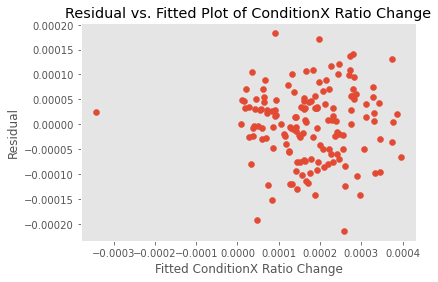

In [102]:
# plot 
plt.scatter(model_case_budget.fittedvalues, model_case_budget.resid)
# adding title and labels
plt.xlabel('Fitted ConditionX Ratio Change')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot of ConditionX Ratio Change')
plt.show()

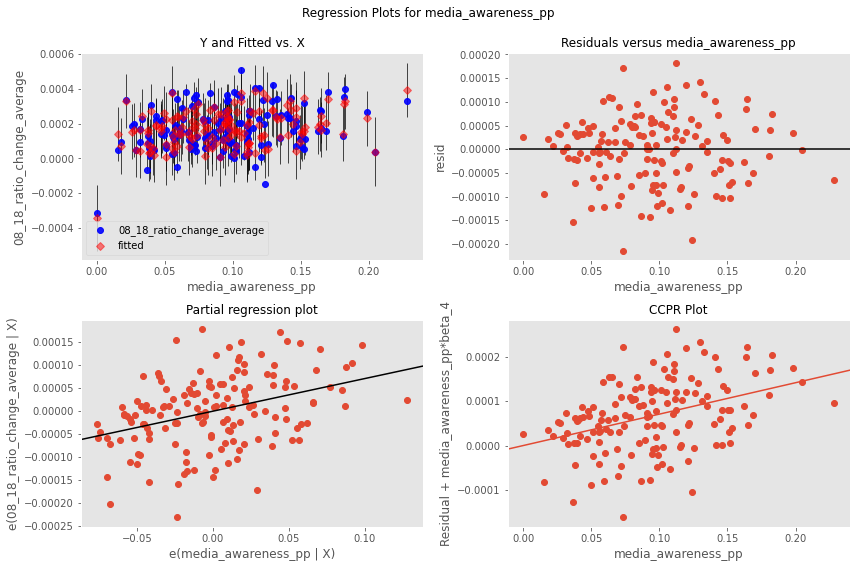

In [122]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model_case_budget, 'media_awareness_pp', fig=fig)

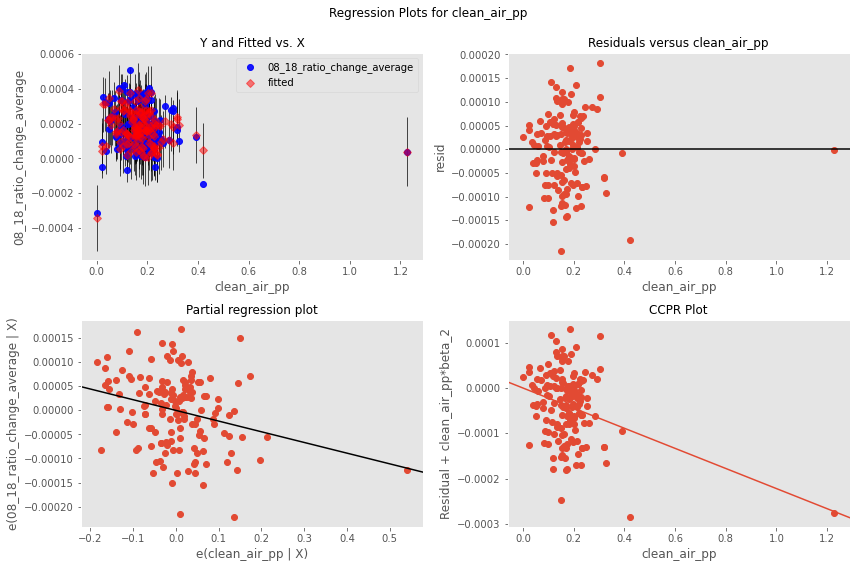

In [124]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model_case_budget, 'clean_air_pp', fig=fig)

In [ ]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model_case_budget, 'clean_air_pp', fig=fig)